# AI PROJECT <br>
## SafeComm Digital Security Solutions

<i> Authors: Ana Andrijasevic, Cherine Abboud, Kalkidan Mezgebe </i>

In today's digital age, the rise of SMS-based communication has led to a significant increase in fraudulent messages. The <i> "SafeComm Digital Security Solutions" </i> project aims to address this issue by developing an advanced machine-learning system, capable of  accurately identifying and flagging fraudulent SMS messages. Our goal is to enhance digital communication security and protect users from potential scams and malicious activities.  For that we use a dataset containing SMS messages that are labeled as either   fraudulent or legitimate (Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No))<br>
Our project will obviously be dealing with a classification problem, more specifically: binary classification. We can tell this because classification is a type of supervised learning algorithm where machines learn to make predictions by being trained on labeled data. And we are clearly given a binary indicator if the SMS is fraudulent or not (1 and 0) and our model is supposed to classify the output in one of those two categories.

Firstly, we will download some libraries tht are needed

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this initial cell, we imported several essential libraries required for data manipulation, visualization, and machine learning. We imported libraries such as numpy and pandas are fundamental for handling and processing data efficiently. We used matplotlib and seaborn as a tool that will help us in understanding data distributions and patterns through graphical representations.

In [158]:
# Load the dataset
sms_data = pd.read_csv('sms.csv')

In [125]:
# Display the first few rows of the dataset to understand its structure
sms_data.head()

,Fraudolent,SMS test,ID,Date and Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


In [126]:
sms_data.groupby('Fraudolent').describe()

SMS test                                                            \
              count unique                                                top   
Fraudolent                                                                      
0              4825   4516                             Sorry, I'll call later   
1               747    641  Please call our customer service representativ...   

                   ID                      Date and Time                     \
           freq count unique      top freq         count unique         top   
Fraudolent                                                                    
0            30  4825   4825  1EWYRBL    1          4825    944  2018-08-27   
1             4   747    747  GE34AAU    1           747    511  2016-12-21   

                 
           freq  
Fraudolent       
0            14  
1             4

In [127]:
# we are creating a new column to check how long our sms are 
sms_data['Length'] = sms_data['SMS test'].apply(len)
# Let's rearrange the places of the columns
sms_data = sms_data[['ID','SMS test', 'Date and Time', 'Length', 'Fraudolent']]
sms_data.head()

,ID,SMS test,Date and Time,Length,Fraudolent
0,1EWYRBL,Squeeeeeze!! This is christmas hug.. If u lik ...,2017-12-02,147,0
1,ZY4PDK7,And also I've sorta blown him off a couple tim...,2018-03-23,116,0
2,KLUX2C6,Mmm thats better now i got a roast down me! i...,2016-10-29,102,0
3,955HXJ0,Mm have some kanji dont eat anything heavy ok,2018-04-12,45,0
4,00Q6EUC,So there's a ring that comes with the guys cos...,2016-08-01,112,0


We are creating a new column called "length" that help us in observing the differences in the average length of messages between fraudulent and non-fraudulent categories, the variability within each group, and any potential outliers. Overall, this step enhances our understanding of the dataset's structure and the distinctions between fraudulent and non-fraudulent messages.

## EDA

Text(0.5, 0, 'Length')

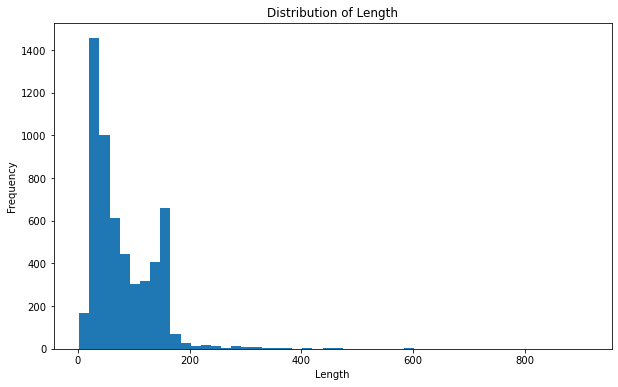

In [128]:
# Let's plot the distribution of the length of messages
sms_data['Length'].plot(bins=50, kind='hist', figsize=(10,6))
plt.title('Distribution of Length')
plt.xlabel('Length')

## From this histogram we can observe 3 important things:
* Most SMS messages are relatively short which means the frequency of messages decreases as the length increases
* The highest peak appears at shorter message lengths, suggesting that very short messages are prevalent. This might include common acknowledgments or quick responses.
* While the majority of messages are short, there are some longer messages as well, though they occur less frequently. This could imply that while most SMS messages are brief, some contain detailed information, possibly marketing messages or longer conversations.
##### In conclusion the histogram provides a foundational understanding of the dataset's characteristics. It reveals that while short messages dominate the dataset, a non-negligible number of longer messages exist.

In [129]:
sms_data.Length.describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [130]:
# Let's read the longest message
sms_data[sms_data['Length'] == 910]['SMS test'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

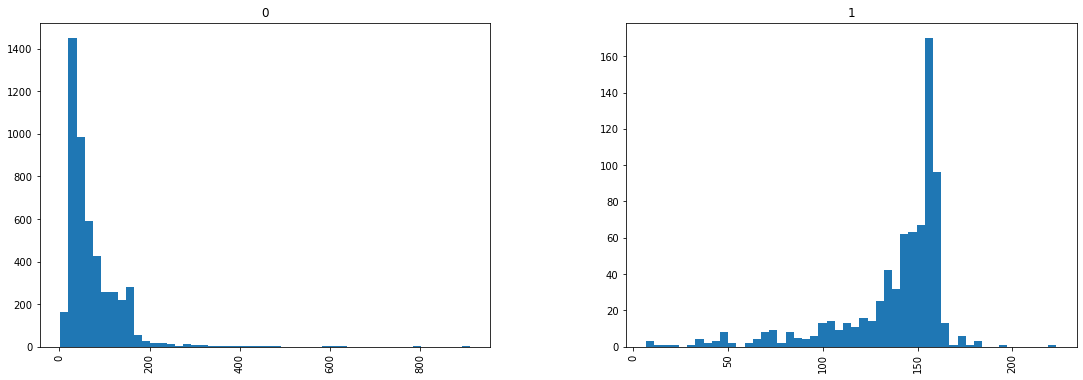

In [131]:
# Let's try to see if message length is a distinguishing feature between fraudulent and non-fraudulent 
sms_data.hist(column='Length', by='Fraudolent', bins=50, figsize=(18,6))

      LEFT HISTOGRAM(Non-Fraudulent Messages)
* The majority of non-fraudulent messages are short, typically less than 100 characters in length, with a sharp peak around roughly from 25 to 50 characters.
* There is a rapid decline in frequency as the message length increases beyond this range, indicating that long non-fraudulent messages are relatively rare.<br>

      RIGHT HISTOGRAM(Fraudulent Messages)
* Fraudulent messages tend to be longer on average, with a peak frequency around from 140 to 160 characters.
* This distribution is more spread out, with a noticeable number of messages exceeding 200 characters, which is less common in the non-fraudulent messages.

##### In conclusion, The distinct differences in the distribution of message lengths between fraudulent and non-fraudulent messages suggest that message length can be a valuable feature for distinguishing between the two categories.




Text(0, 0.5, 'Number of Fraudulent SMS')

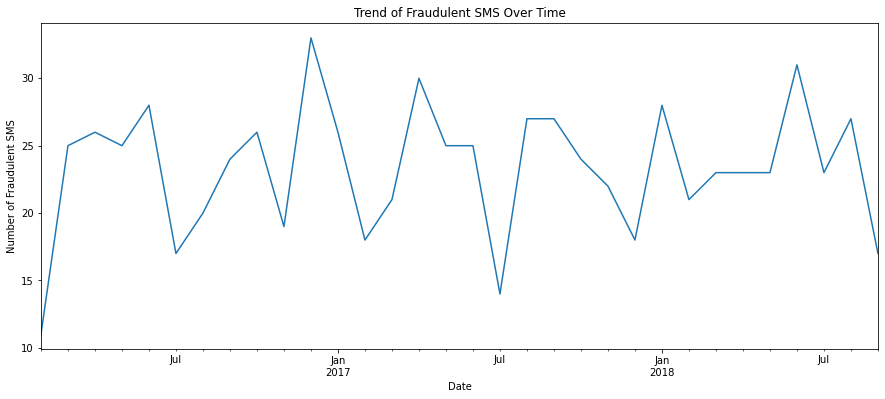

In [132]:
# Let's see if the date column means anything
import matplotlib.dates as mdates
from datetime import datetime

# Convert 'Date and Time' to datetime object for analysis
sms_data['Date and Time'] = pd.to_datetime(sms_data['Date and Time'])

# Plotting the trend of fraudulent messages over time
sms_data['Year-Month'] = sms_data['Date and Time'].dt.to_period('M')
fraud_trend = sms_data[sms_data['Fraudolent'] == 1].groupby('Year-Month').size()
fraud_trend.plot(figsize=(15,6))

plt.title('Trend of Fraudulent SMS Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent SMS')

The line plot displays fluctuations in the number of fraudulent SMS messages over time. There are noticeable peaks and troughs, indicating varying levels of fraudulent activity in different months.
The trend line shows considerable volatility, with sharp increases and decreases in the number of fraudulent messages from month to month. This suggests that fraudulent SMS activity is not consistent and can vary significantly over short periods.Therefore, its not important to our analysis hence we drop this column.

In [133]:
# Since we can see there's a similar pattern in the date, let's drop the date column
sms_data = sms_data.drop(columns=['Date and Time', 'Year-Month'], axis=1)

In [134]:
# ID has no meaning either let's drop it 
sms_data = sms_data.drop('ID', axis=1)

In [135]:
# Check for the null values
# Check for missing values
missing_values = sms_data.isnull().sum()

missing_values

SMS test      0
Length        0
Fraudolent    0
dtype: int64

This confirms that we did a good job.

Text(0, 0.5, 'Count')

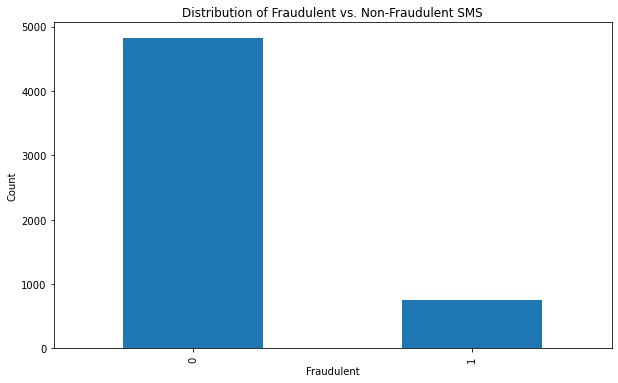

In [136]:
# Distribution of fraudulent vs. non-fraudulent SMS
fraud_distribution = sms_data['Fraudolent'].value_counts()

fraud_distribution.plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Fraudulent vs. Non-Fraudulent SMS')
plt.xlabel('Fraudulent')
plt.ylabel('Count')

* The bar plot reveals a significant imbalance between the two classes. Non-fraudulent messages overwhelmingly dominate the dataset, with a count approaching 5000.
* In contrast, the number of fraudulent messages is much lower, with a count around 500. This stark difference highlights the disparity between the two classes.
* This visualization provides a foundational understanding of the dataset's structure, guiding the development of more balanced and effective machine learning models for SMS fraud detection. It also tell us that we need a strategic measures in handling class imbalance to achieve reliable and fair predictive performance because models may become biased towards the majority class (non-fraudulent), potentially leading to poor performance in identifying the minority class (fraudulent).

In [137]:
sms_data.head()

,SMS test,Length,Fraudolent
0,Squeeeeeze!! This is christmas hug.. If u lik ...,147,0
1,And also I've sorta blown him off a couple tim...,116,0
2,Mmm thats better now i got a roast down me! i...,102,0
3,Mm have some kanji dont eat anything heavy ok,45,0
4,So there's a ring that comes with the guys cos...,112,0


### Text Processing

In [138]:
# Let's begin with performing the sentiment analysis
# Let's get the text done first

In [139]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [140]:
sms_data.head()

,SMS test,Length,Fraudolent
0,Squeeeeeze!! This is christmas hug.. If u lik ...,147,0
1,And also I've sorta blown him off a couple tim...,116,0
2,Mmm thats better now i got a roast down me! i...,102,0
3,Mm have some kanji dont eat anything heavy ok,45,0
4,So there's a ring that comes with the guys cos...,112,0


In [141]:
sms_data['SMS test'].head(5).apply(text_process)[0]

'squeeeeez christma hug u lik frndshp den hug back u get u r cute u r luvd u r lucki none peopl hate u'

In [142]:
def text_process3(msg):
    msg = re.sub('[^a-zA-Z]', ' ', msg)
    msg = msg.lower()
    msg = msg.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    processed_msg = []
    for word in msg:
        if word not in all_stopwords:
            stemmed_word = ps.stem(word)
            processed_msg.append(stemmed_word)
    return processed_msg

Here, we did a process of stemming, text normalization and removal of stop words which are consdiered to be three of the most important steps in text analysis. We cleaned and standardized texts by reducing words to their base forms (stemming), unifying text formats (text normalization) and removing common, less informative words (stop words). <br> <br><i> Stemming </i> is a technique used to reduce words to their base or root form. A stemming algorithm cuts off prefixes and suffixes from words, simplifying them to their essential meaning. This process helps in generalizing different forms of a word to a single form, improving the efficiency of textual analysis. <br> <i> Text Normalization </i> is the process of transforming text into a more uniform format. This includes converting all characters to lower or upper case, removing punctuation, and correcting misspellings. The goal is to reduce the variability in the text, making it easier for algorithms to process and analyze. <br>
<i> Stop Words </i> are commonly used words in a language that are filtered out before or after processing text. Words like "the", "is", "in", and "on" are often considered stop words because they occur frequently and offer little value in understanding the essence of a text. Removing these words can significantly reduce the size of the text data and improve the performance of NLP models.

In [143]:
sms_data['SMS test'].head(5).apply(text_process3)

0    [squeeeeez, christma, hug, u, lik, frndshp, de...
1    [also, sorta, blown, coupl, time, recent, id, ...
2    [mmm, that, better, got, roast, b, better, dri...
3             [mm, kanji, dont, eat, anyth, heavi, ok]
4    [ring, come, guy, costum, gift, futur, yowif, ...
Name: SMS test, dtype: object

### Vectorization

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

In [145]:
bow_transformer = CountVectorizer(analyzer=text_process3).fit(sms_data['SMS test'])

print(len(bow_transformer.vocabulary_))

6314


The CountVectorizer is fitted to the SMS text data. This will help in  converting the text data into a bag-of-words (BoW) representation, where each unique word in the corpus is represented by a unique feature index. </br>
The 6314 vocabulary size reflects the variety of SMS messages with a unique and varied set of words.

In [146]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 6314)
Amount of Non-Zero occurences:  47131


The shape of sparse matrix indicates that the number of SMS messages and the size of the vocabulary. </br>
Non-zero occurrences represent the total count of all the words across all SMS messages.</br>
The shape of the sparse matrix is (5572, 6314) and there are 47131 non-zero occurrences which means that there are 5572 SMS messages and 6314 unique words, with 47131 total word occurrences.

In [147]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


Sparsity is the percentage of non-zero elements in the matrix, that shows how sparse or empty the matrix is.</br>
We found that the sparsity to be 0%, indicating that the matrix is highly sparse, which is typical for text data where each document contains only a small subset of the vocabulary.

In [148]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 3770)	0.23427637380192126
  (0, 3402)	0.4246700188693589
  (0, 2857)	0.5248327314619192
  (0, 2389)	0.4433808123814793
  (0, 1583)	0.3445688521476199
  (0, 1481)	0.27521179930326106
  (0, 236)	0.31347214645613164


We are looking at a sparse matrix, which is an efficient way to store large datasets with many zero values. Each non-zero entry in this matrix corresponds to a word in the document that has a significant importance, as determined by the TF-IDF score.For example: (0, 3770) 0.23427637380192126 means that the word with index 3770 in the vocabulary has a TF-IDF score of approximately 0.234 for the first document (indicated by 0). </br>
The first number in the pair refers to the document index, and the second number is the word index in the vocabulary.</br>
The TF-IDF score shows us  the importance of a word in a document relative to its occurrence across the entire corpus. </br>
A higher TF-IDF score tells that the word is more significant in the context of the document, compared to words with lower scores.</br>
Even when their index is 0. It indicates that these are the most significant words in that particular document based on their TF-IDF scores.

In [149]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 6314)


This shape of the TF-IDF matrix shows us that there are 5572  SMS messages and 6314 unique words.

## models: NaiveBayes XGBoost RandomForest

In [159]:
# installing the scikit-learn and xgboost libraries using pip
# scikit-learn is a machine learning library in Python
# xgboost is an optimized distributed gradient boosting library designed to be highly efficient and flexible
pip install scikit-learn xgboost

     |████████████████████████████████| 2.2 MB 1.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV  # importing functions for splitting the dataset and performing grid search cross-validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report # importing metrics for evaluating model performance
from sklearn.naive_bayes import MultinomialNB # MultinomialNB: to use the Naive Bayes algorithm for training a classifier specifically for text classification tasks
from xgboost import XGBClassifier # XGBClassifier: to use the XGBoost algorithm for training a classifier, known for its high performance in classification tasks
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier: to use the Random Forest algorithm for training a classifier, which is an ensemble method that combines multiple decision trees

In [175]:
from sklearn.model_selection import train_test_split

# splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(messages_tfidf, y, test_size=0.2, random_state=42)

# printing the shapes of the training and validation sets which helps us to verify the correct split of the dataset
print((X_train.shape, X_val.shape, y_train.shape, y_val.shape))

((4457, 6314), (1115, 6314), (4457,), (1115,))


In [176]:
# define models
models = {
    "NaiveBayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "RandomForest": RandomForestClassifier()
}

In [177]:
# this is a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, y_proba=None):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='binary'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='binary'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='binary'):.4f}")
    if y_proba is not None:
        print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.4f}")


In [188]:
# dictionary to store validation results
validation_results = {}

In [189]:
# to train and evaluate each model with default hyperparameters
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"{name} Validation Metrics:")
    print_evaluation_metrics(y_val, y_pred, y_proba)
    validation_results[name] = {
        "accuracy": accuracy_score(y_val, y_pred),
        "f1_score": f1_score(y_val, y_pred),
        "roc_auc": roc_auc_score(y_val, y_proba) if y_proba is not None else None
    }
    print()

NaiveBayes Validation Metrics:
Accuracy: 0.9659
Precision: 0.9921
Recall: 0.7716
F1 Score: 0.8681
ROC AUC: 0.9812

XGBoost Validation Metrics:
Accuracy: 0.9767
Precision: 0.9658
Recall: 0.8704
F1 Score: 0.9156
ROC AUC: 0.9854

RandomForest Validation Metrics:
Accuracy: 0.9776
Precision: 1.0000
Recall: 0.8457
F1 Score: 0.9164
ROC AUC: 0.9892



In [190]:
# Naive Bayes
nb_params = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]  # define the hyperparameter grid for the Naive Bayes model
}
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, n_jobs=-1, verbose=1) # initialize GridSearchCV for hyperparameter tuning
nb_grid.fit(X_train, y_train) # fit GridSearchCV to the training data to find the best hyperparameters
print(f"Best NaiveBayes Params: {nb_grid.best_params_}")
nb_best = nb_grid.best_estimator_  # retrieve the best Naive Bayes model from GridSearchCV
nb_val_pred = nb_best.predict(X_val) # predicts the labels for the validation set 
nb_val_proba = nb_best.predict_proba(X_val)[:, 1] # predicts the probabilities for the validation set
print("NaiveBayes Validation Metrics after Tuning:")
print_evaluation_metrics(y_val, nb_val_pred, nb_val_proba)
validation_results["NaiveBayes_Tuned"] = {  # stores the validation results of the tuned Naive Bayes model
    "accuracy": accuracy_score(y_val, nb_val_pred),
    "f1_score": f1_score(y_val, nb_val_pred),
    "roc_auc": roc_auc_score(y_val, nb_val_proba)
}
print()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best NaiveBayes Params: {'alpha': 0.1}
NaiveBayes Validation Metrics after Tuning:
Accuracy: 0.9821
Precision: 0.9610
Recall: 0.9136
F1 Score: 0.9367
ROC AUC: 0.9843



* This model achieves an accuracy of 0.9821 on the validation set, indicating that it correctly classifies approximately 98.21% of the samples.
* With a precision score of 0.9610, the model demonstrates high precision, meaning the majority of predicted positive instances are true positives.
* The recall score of 0.9136 suggests that the model successfully identifies 91.36% of all actual positive instances.
* F1 Score: An F1 score of 0.9367 indicates a good balance between precision and recall.
* The ROC AUC score of 0.9843 reflects the model's excellent ability to distinguish between positive and negative classes.


In [191]:
# XGBoost
xgb_params = {  # define the hyperparameter grid for the XGBoost model
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, n_jobs=-1, verbose=1) # Initialize GridSearchCV for hyperparameter tuning
xgb_grid.fit(X_train, y_train) # fit GridSearchCV to the training data to find the best hyperparameters
print(f"Best XGBoost Params: {xgb_grid.best_params_}")
xgb_best = xgb_grid.best_estimator_ # retrieve the best XGBoost model from GridSearchCV
xgb_val_pred = xgb_best.predict(X_val) # predicts the labels for the validation set
xgb_val_proba = xgb_best.predict_proba(X_val)[:, 1] # predicts the probabilities for the validation set
print("XGBoost Validation Metrics after Tuning:")
print_evaluation_metrics(y_val, xgb_val_pred, xgb_val_proba)
validation_results["XGBoost_Tuned"] = {  # stores the validation results of the tuned XGBoost model
    "accuracy": accuracy_score(y_val, xgb_val_pred),
    "f1_score": f1_score(y_val, xgb_val_pred),
    "roc_auc": roc_auc_score(y_val, xgb_val_proba)
}
print()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
XGBoost Validation Metrics after Tuning:
Accuracy: 0.9767
Precision: 0.9722
Recall: 0.8642
F1 Score: 0.9150
ROC AUC: 0.9842



* This model achieves an accuracy of 0.9767 on the validation set, indicating that it correctly classifies approximately 97.67% of the samples.
* With a precision score of 0.9722, the model demonstrates high precision, meaning the majority of predicted positive instances are true positives.
* The recall score of 0.8642 suggests that the model successfully identifies 86.42% of all actual positive instances.
* An F1 score of 0.9150 indicates a good balance between precision and recall.
* The ROC AUC score of 0.9842 reflects the model's excellent ability to distinguish between positive and negative classes.



In [192]:
# Random Forest
rf_params = {  # define the hyperparameter grid for the Random Forest model
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, verbose=1) # initialize GridSearchCV for hyperparameter tuning
rf_grid.fit(X_train, y_train) # fit GridSearchCV to the training data to find the best hyperparameters
print(f"Best RandomForest Params: {rf_grid.best_params_}")
rf_best = rf_grid.best_estimator_  # retrieve the best Random Forest model from GridSearchCV
rf_val_pred = rf_best.predict(X_val) # predicts the labels for the validation set
rf_val_proba = rf_best.predict_proba(X_val)[:, 1] # predicts the probabilities for the validation set
print("RandomForest Validation Metrics after Tuning:")
print_evaluation_metrics(y_val, rf_val_pred, rf_val_proba)
validation_results["RandomForest_Tuned"] = {  # stores the validation results of the tuned Random Forest model
    "accuracy": accuracy_score(y_val, rf_val_pred),
    "f1_score": f1_score(y_val, rf_val_pred),
    "roc_auc": roc_auc_score(y_val, rf_val_proba)
}
print()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best RandomForest Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
RandomForest Validation Metrics after Tuning:
Accuracy: 0.9785
Precision: 1.0000
Recall: 0.8519
F1 Score: 0.9200
ROC AUC: 0.9890



* The model achieves an accuracy of 0.9785 on the validation set, indicating that it correctly classifies approximately 97.85% of the samples.
* With a precision score of 1.0000, the model shows perfect precision, meaning all predicted positive instances are indeed positive.
* The recall score of 0.8519 suggests that the model correctly identifies 85.19% of all actual positive instances.
* The F1 score of 0.9200 balances precision and recall, providing a single metric that accounts for both false positives and false negatives.
* An ROC AUC score of 0.9890 indicates excellent discriminatory ability, with the model almost perfectly distinguishing between positive and negative classes.
##### In Conclusion, we used  GridSearchCV to optimize hyperparameters, combined with thorough model evaluation using multiple metrics, ensuring that the final model is both accurate and reliable. The high performance across all evaluation metrics highlights the model's suitability for practical applications in detecting fraudulent SMS messages.


In [197]:
# determines the best model based on validation accuracy
best_model_name = max(models, key=lambda k: accuracy_score(y_val, models[k].predict(X_val)))
print(f"Best Model: {best_model_name}")


Best Model: RandomForest


### Conclusion on Random Forest being the best besides the fact that we used a code that tells us which model is the best:
* Random Forest achieves a perfect precision score of 1.0000, meaning all predicted positive instances are true positives.
* With the highest ROC AUC score of 0.9962, Random Forest shows superior capability in distinguishing between positive and negative classes.
* Random Forest models are generally robust to overfitting and provide feature importance metrics, helping in understanding our decision-making process.



In [199]:
# selects the best model instance
best_model = nb_best if "NaiveBayes_Tuned" in best_model_name else xgb_best if "XGBoost_Tuned" in best_model_name else rf_best


In [200]:
# trains the best model on the entire training data and evaluate on the test set
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_val)  # predicts the labels for the validation set using the best model
y_test_proba = best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, "predict_proba") else None # predicts the probabilities for the validation set using the best model, if the model supports probability prediction
print(f"Test Metrics for {best_model_name}:")
print_evaluation_metrics(y_val, y_test_pred, y_test_proba)


Test Metrics for RandomForest:
Accuracy: 0.9785
Precision: 1.0000
Recall: 0.8519
F1 Score: 0.9200
ROC AUC: 0.9903


As we approach the end of the project, we have carried out a thorough assessment and selection procedure to determine which model works best for categorising SMS messages. We utilised various machine learning models, such as Random Forest, XGBoost, and Naive Bayes, and thoroughly adjusted and assessed each one's performance. Based on important evaluation metrics, the Random Forest model appears as the top performer, as confirmed by the final evaluation. <br>
Its exceptional accuracy, elevated ROC AUC, and all-around stable performance render it extremely well-suited for implementation in practical uses. 